# SIFT

Prior to Deep CNNs, SIFT provided the best technology for identifying objects between images. In this CC, you will get experience with the SIFT algorithm.

[SIFT](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)

In [1]:
# Loading an image to play with

!wget https://cdn.pixabay.com/photo/2013/03/01/18/48/can-87993_960_720.jpg -O coke.jpg

--2018-06-05 15:21:51--  https://cdn.pixabay.com/photo/2013/03/01/18/48/can-87993_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 213.239.228.134, 213.239.228.182, 213.239.228.180, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|213.239.228.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51506 (50K) [image/jpeg]
Saving to: ‘coke.jpg’

coke.jpg            100%[===================>]  50.30K  --.-KB/s    in 0.1s    

2018-06-05 15:21:52 (338 KB/s) - ‘coke.jpg’ saved [51506/51506]



In [2]:
# Reinstalling opencv - the public distribution of OpenCV does not include SIFT,
# an algorithm patented by David Lowe and his university.

!pip uninstall -y opencv-python
!pip install opencv-contrib-python

Uninstalling opencv-python-3.4.1.15:
  Successfully uninstalled opencv-python-3.4.1.15
    100% |████████████████████████████████| 30.3MB 1.8MB/s 


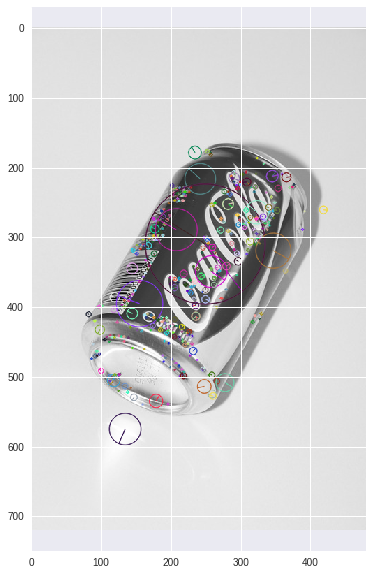

In [45]:
# Import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input and output images
img = cv2.imread('coke.jpg')
out = cv2.imread('coke.jpg')
# Convert to grayscale (SIFT does not work with color)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# SIFT object
sift = cv2.xfeatures2d.SIFT_create()
# SIFT keypoint detection with DoG Kernel and Scale Space
kp = sift.detect(gray,None)

# Draw detected features on output image
cv2.drawKeypoints(gray,kp,out,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(6,10))
plt.axes().set_aspect('equal', 'datalim')
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB));

--2018-06-05 15:23:35--  https://images.pexels.com/photos/50593/coca-cola-cold-drink-soft-drink-coke-50593.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.16.242.112, 104.16.240.112, 104.16.239.112, ...
Connecting to images.pexels.com (images.pexels.com)|104.16.242.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1236775 (1.2M) [image/jpeg]
Saving to: ‘coke-test.jpg’

coke-test.jpg       100%[===================>]   1.18M  2.72MB/s    in 0.4s    

2018-06-05 15:23:35 (2.72 MB/s) - ‘coke-test.jpg’ saved [1236775/1236775]



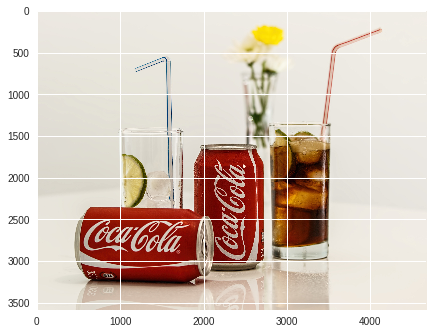

In [4]:
!wget https://images.pexels.com/photos/50593/coca-cola-cold-drink-soft-drink-coke-50593.jpeg -O coke-test.jpg
    
test = cv2.imread('coke-test.jpg')
test = test.astype(np.uint8)
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB));

# Challenge

Apply the same SIFT algorithm to the above image containing two coke cans and print their SIFT keypoints. Can you see reusability of those keypoints? Identify visually if the algorithm has identified similar features between the training image and the test image.

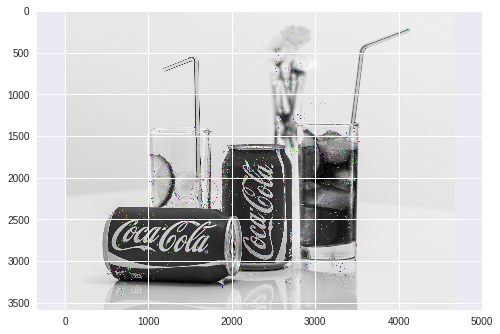

In [46]:
# Load input and output images
img2 = cv2.imread('coke-test.jpg')
out2 = cv2.imread('coke-test.jpg')
# Convert to grayscale (SIFT does not work with color)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT keypoint detection with DoG Kernel and Scale Space
kp2, des2 = sift.detectAndCompute(gray2, None)

# Draw detected features on output image
cv2.drawKeypoints(gray2, kp2, out2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.axes().set_aspect('equal', 'datalim')
plt.imshow(cv2.cvtColor(out2, cv2.COLOR_BGR2RGB));

In [47]:
print(len(kp2))
print(des2)

6896
[[ 31.   2.   0. ...   0.   0.   0.]
 [ 75.  20.   1. ...   0.   1.  33.]
 [ 77.  22.   1. ...   0.   2. 137.]
 ...
 [  8. 132.  44. ...   0.   0.  32.]
 [  0.   0.  20. ...   0.   0.   0.]
 [  1.  20.   4. ...   0.   1.  13.]]


In [49]:
kp, des = sift.compute(gray, kp)
print(len(kp))
print(des)

442
[[ 1.  5. 22. ...  0.  0.  0.]
 [18.  9.  1. ...  0.  0.  4.]
 [19.  0.  2. ...  2.  1. 36.]
 ...
 [37.  1.  1. ... 22.  3. 19.]
 [24. 12.  1. ...  2.  0.  0.]
 [15. 13.  0. ...  4.  0.  0.]]


A lot more keypoints were found in `coke-test.jpg`, but they appear to have smaller neighborhoods. Because of this, it is hard to tell whether the keypoints found are similar, or reusable. Carefully comparing their description vectors could probably yield a more precise understanding.

# Stretch Challenge

Look for similarities in the values returned in the `kp` object between the training and test image. Can you build an algorithm that will identify them and create some threshold for marking if an image is found?

There are many approaches to this. Start by looking at the data yourself and trying to find a similarity between the descriptors you see in the images and the descriptors you see in the `kp` object.

Once you've tried to intuit a method, look at the following methods that have been described in the literature:

[Feature Matching](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html)

[Feature Detection and Description](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html)

### Brute Force Matching

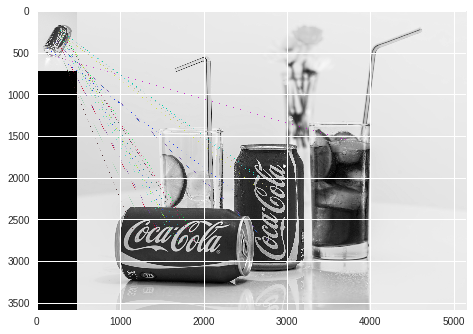

In [58]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, good, None, flags=2)

plt.imshow(img3), plt.show();

It seems that the test image is a lot larger than the train image. This would explain why, relative to it, the keypoints found seemed smaller.

### Fast Approximate Nearest Neighbors Matching

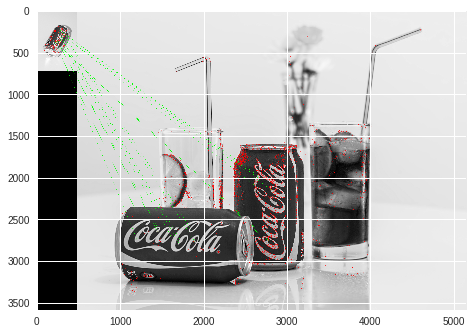

In [61]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i, (m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img4 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, matches, None, **draw_params)

plt.imshow(img4,), plt.show();

Both matching algorithms match features from the soda can in one image to the soda cans in the other image, and not to the empty or filled glasses.